In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from itertools import product


DATA_DIR = Path('../data')

# Load Siju Data

In [2]:
sdf = pd.read_pickle(DATA_DIR /'siju-cleaned-expanded-pivot.pkl')

s_shape = sdf.shape
print(f'Dataframe shape: {s_shape}')
print(f'Number of experiments: {s_shape[0]}')

lobes = sdf['DAN dF/F'].columns.values

sdf.head(15)

Dataframe shape: (90, 16)
Number of experiments: 90


stimulus  DAN dF/F            \
lobe                                                alpha'1   alpha'2   
id                                                                      
TH-58E02_090816_Citronella             citronella  0.476658  0.412485   
TH-58E02_170816_Citronella             citronella  0.432107  0.527736   
181022_TH58E02G6f_ST00_0_Citronella    citronella  0.423704  0.083843   
171016_Citronella 2                    citronella  0.610923  0.427451   
171016_Citronella 1                    citronella  0.671743  0.539444   
170206_0_TH58E02G6f_ST00_0_Citronella  citronella  0.579707  0.515238   
TH-58E02_100816_Citronella             citronella  0.074022  0.081323   
181022_TH58E02G6f_ST00_1_Citronella    citronella  0.566389 -0.008650   
TH-58E02_230816_Citronella             citronella  0.429985  0.201972   
100217_Citronella 2                    citronella  0.150294  0.526108   
100217_Citronella 1                    citronella  0.003962  0.021492   
181214a_TH58E02G6f_ST00_1_Ethanol         ethanol  0.219558  0.229423   
181214a_TH58E02G6f_ST00_0_Ethanol         ethanol  0.180849  0.162146   
190114_TH58E02G6f_ST00_1_Ethanol          ethanol  0.080391  0.050828   
190115_TH58E02G6f_ST00_1_Ethanol          ethanol  0.542497  1.120975   

                                                                               \
lobe                                    alpha'3    alpha1    alpha2    alpha3   
id                                                                              
TH-58E02_090816_Citronella             0.226218  0.341723  0.230774  1.023435   
TH-58E02_170816_Citronella             0.175783  0.034967  0.245432  0.371485   
181022_TH58E02G6f_ST00_0_Citronella    0.379430 -0.011456  0.097590  0.640199   
171016_Citronella 2                   -0.009572  0.135995  0.637080  0.009996   
171016_Citronella 1                    2.572961  0.102841  0.927985  0.578673   
170206_0_TH58E02G6f_ST00_0_Citronella  0.014947  0.133521  0.387919 -0.002624   
TH-58E02_100816_Citronella             0.162766 -0.005692  0.096002  0.606761   
181022_TH58E02G6f_ST00_1_Citronella    0.235426 -0.031015  0.010509  0.699198   
TH-58E02_230816_Citronella             0.617254  0.156067  0.130012  0.291127   
100217_Citronella 2                    1.044857  0.007663  0.442740  0.834893   
100217_Citronella 1                    0.021565  0.005467  0.052473  0.052330   
181214a_TH58E02G6f_ST00_1_Ethanol      1.829732  0.285169  0.302191  0.433584   
181214a_TH58E02G6f_ST00_0_Ethanol      1.127212  0.364840  0.388118  0.280842   
190114_TH58E02G6f_ST00_1_Ethanol       0.101479 -0.034685  0.050175  0.027346   
190115_TH58E02G6f_ST00_1_Ethanol       1.881488  0.139967  1.196738  0.146160   

                                                                               \
lobe                                     beta'1    beta'2     beta1     beta2   
id                                                                              
TH-58E02_090816_Citronella             0.586997  0.837626  0.624777  0.990563   
TH-58E02_170816_Citronella             0.457447  0.520961  0.281905  0.639173   
181022_TH58E02G6f_ST00_0_Citronella    0.695688  0.670628  0.269143  0.506330   
171016_Citronella 2                    0.079676  0.021876 -0.013304 -0.007225   
171016_Citronella 1                    0.682591  0.582773  0.211340  0.530082   
170206_0_TH58E02G6f_ST00_0_Citronella  1.257869  0.557322  0.286436  0.435132   
TH-58E02_100816_Citronella             0.226170  0.194790 -0.020776  0.148452   
181022_TH58E02G6f_ST00_1_Citronella    0.167011  0.523209 -0.023601  0.137440   
TH-58E02_230816_Citronella             0.509043  0.728653  0.310443  0.733599   
100217_Citronella 2                    0.544587  0.982937  0.140385  0.593129   
100217_Citronella 1                    0.048767  0.260411  0.204364  0.462892   
181214a_TH58E02G6f_ST00_1_Ethanol      2.009519  0.519106  0.299079  0.737102   
181214a_TH58E02G6f_ST00_0_Ethanol      1.353867  0.4

# Load Hije Data

In [3]:
hdf = pd.read_pickle(DATA_DIR /'hije-cleaned-expanded-pivot.pkl')
hdf = hdf[['stimulus', 'MBON dF/F']]

h_shape = hdf.shape
print(f'Dataframe shape: {h_shape}')
print(f'Number of experiments: {h_shape[0]}')

hdf.head(7)

Dataframe shape: (45, 16)
Number of experiments: 45


stimulus  MBON dF/F                                   \
lobe                            alpha'1    alpha'2    alpha'3     alpha1   
id                                                                         
2-heptanone_fly0   heptanone  57.014634  53.449785  14.488461  31.733999   
2-heptanone_fly1   heptanone  44.168362  91.255851  17.765559  29.395413   
2-heptanone_fly2   heptanone  30.958356  67.175713  19.834570  25.548454   
2-heptanone_fly3   heptanone  36.248176  50.087333  18.659880  21.263302   
2-heptanone_fly4   heptanone  14.150340  21.817438  11.888643  18.037705   
citronella_fly0   citronella   9.145744  13.330172   6.479354  15.588128   
citronella_fly1   citronella   7.703690  40.631430   7.078989   4.574127   

                                                                         \
lobe                 alpha2     alpha3     beta'1     beta'2      beta1   
id                                                                        
2-heptanone_fly0  35.150185  50.098322  29.570272  25.684328  34.010916   
2-heptanone_fly1  28.380873  21.858113  24.830531  16.444911  43.192486   
2-heptanone_fly2  31.033140  79.720826  25.744823  17.759295  46.527031   
2-heptanone_fly3  20.912131  44.043983  38.035029  10.343638  26.904135   
2-heptanone_fly4  17.063540  22.347819  24.288879   5.184545  14.825427   
citronella_fly0   10.570066  17.000106  11.624537   7.213102   4.724735   
citronella_fly1    5.869578   9.866845   9.049924   8.741619   6.091844   

                                                                         \
lobe                  beta2     gamma1     gamma2     gamma3     gamma4   
id                                                                        
2-heptanone_fly0  11.951235  46.239205  66.086409  42.144978  60.102633   
2-heptanone_fly1  27.904354  53.975628  37.821266  47.514654  52.499951   
2-heptanone_fly2  22.010365  28.879761  29.721496  39.124175  45.002144   
2-heptanone_fly3   5.369238  41.142201  31.954230  70.776622  39.891746   
2-heptanone_fly4   9.185952  11.818865  12.767847  37.395544  31.264467   
citronella_fly0    9.355339  14.749717  11.840836   9.306843  19.146169   
citronella_fly1   21.688741  -0.131161   8.102770  14.725160  17.584257   

                             
lobe                 gamma5  
id                           
2-heptanone_fly0  11.447692  
2-heptanone_fly1   3.998101  
2-heptanone_fly2   1.734179  
2-heptanone_fly3   0.429397  
2-heptanone_fly4  -2.034475  
citronella_fly0    1.595632  
citronella_fly1    0.329512

# Examine a distribution across stimuli (siju)

How is the data distributed?

## 1. Not Normalised data

First look at a single lobe. Note that this is not normalised data.

In [4]:
alphap1 = sdf['DAN dF/F']["alpha'1"]

alphap1.describe()

count    90.000000
mean      0.436545
std       0.376394
min      -0.065685
25%       0.160564
50%       0.350663
75%       0.606595
max       1.922710
Name: alpha'1, dtype: float64

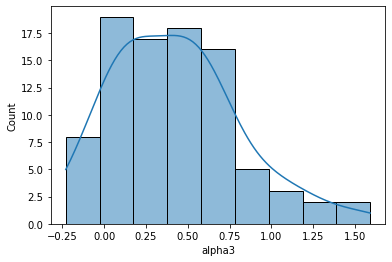

In [5]:
plt.figure()
sns.histplot(data=sdf['DAN dF/F'], x="alpha3", kde=True, alpha=0.5)
plt.show()

So this looks like a Lognormal distribution. Now try plot the KDE for all of the lobes and see if a pattern emerges:

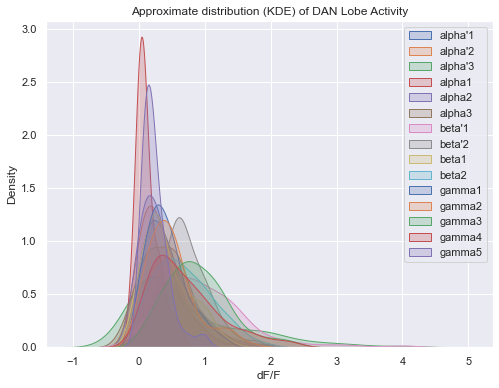

In [6]:
cols = list(sdf['DAN dF/F'].columns)

sns.set()
plt.figure(figsize=[8,6])
plt.title('Approximate distribution (KDE) of DAN Lobe Activity')
plt.xlabel('dF/F')

for col in cols:
    # sns.histplot(data=sdf['DAN dF/F'][col], kde=True, alpha=0.5)
    sns.kdeplot(data=sdf['DAN dF/F'][col], fill=True, label=col)
plt.legend()

plt.show()

## 2. Now normalise the data

In [7]:
lobe_data = sdf['DAN dF/F']

min_activity = lobe_data.min().min()
max_activity = lobe_data.max().max()

normalised_lobe_data = (lobe_data - min_activity) / (max_activity - min_activity)

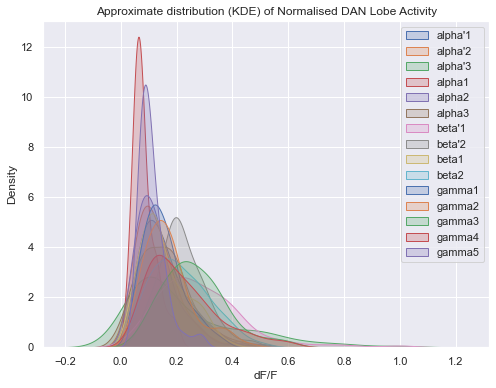

In [8]:
plt.figure(figsize=[8,6])
plt.title('Approximate distribution (KDE) of Normalised DAN Lobe Activity')
plt.xlabel('dF/F')

for col in cols:
    # sns.histplot(data=normalised_lobe_data[col], kde=True, alpha=0.5)
    sns.kdeplot(data=normalised_lobe_data[col], fill=True, label=col)
plt.legend()

plt.show()

Generally, the data seems to follow a **Lognormal distribution**. Lets see how well this distribution fits the data.

## Experiment with fit

In [9]:
from scipy.stats import lognorm, norm

In [35]:
greek_lobes = [
    r"$\alpha'_1$", r"$\alpha'_2$", r"$\alpha'_3$", 
    r'$\alpha_1$', r'$\alpha_2$', r'$\alpha_3$', 
    r"$\beta'_1$", r"$\beta'_2$",
    r'$\beta_1$', r'$\beta_2$', 
    r'$\gamma_1$', r'$\gamma_2$', r'$\gamma_3$', r'$\gamma_4$', r'$\gamma_5$'
]

alpha3 Invalid values in `data`.  Maximum likelihood estimation with 'lognorm' requires that 0.0 < x < inf for each x in `data`.


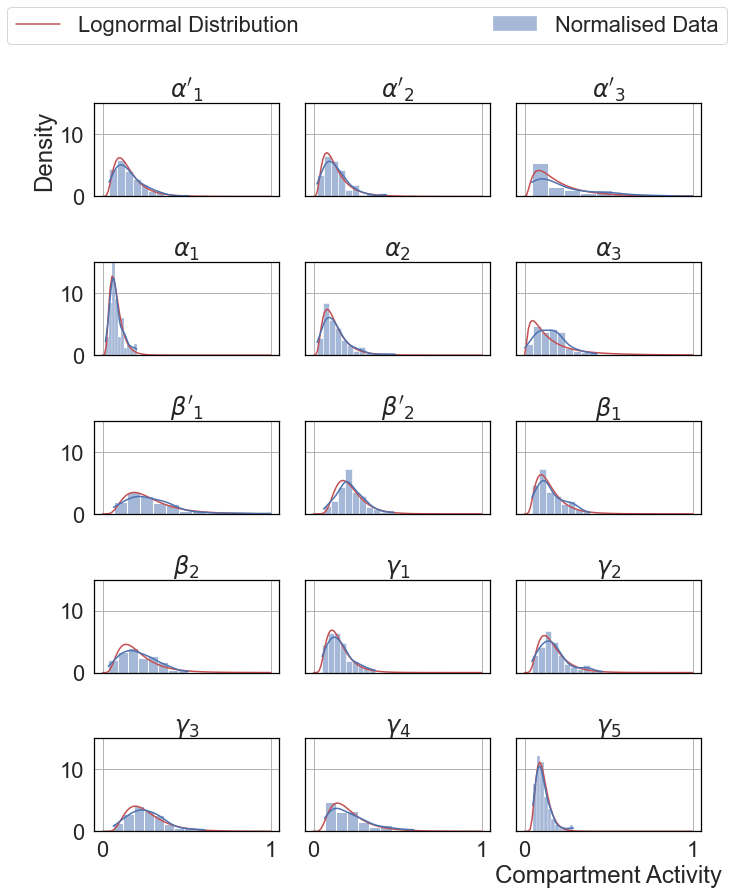

In [56]:
sns.set_context("notebook",font_scale=2)
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0.7','font.family':'Arial'})


fig, axes = plt.subplots(5, 3, figsize=(10,12), sharex='all', sharey='all')
# fig.suptitle('Fit DAN Activity to Lognorm Distribution')

for i, lobe in enumerate(lobes):
    data = normalised_lobe_data[lobe]
    try:
        fit_params = lognorm.fit(data, floc=0)
    except Exception as e:
        print(lobe, e)
        data = normalised_lobe_data[lobe].copy()
        data.loc[data==0] = 0.001
        fit_params = lognorm.fit(data, floc=0)

    x = np.linspace(0,1,90)
    y = lognorm.pdf(x, s=fit_params[0], loc=fit_params[1], scale=fit_params[2])

    ax = axes[int(i/3), i%3]
    ax.set_title(greek_lobes[i])
    ax.set_ylim([0, 15])
    ax.plot(x, y, 'r', label='Lognormal Distribution')
    sns.histplot(data=data, kde=True, stat='density', label='Normalised Data', ax=ax)
    ax.set_xlabel('')
    if i == 0:
        ax.set_ylabel('Density')
    else:
        ax.set_ylabel('')

ax.set_xlabel('Compartment Activity')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, mode="expand", bbox_to_anchor=(0., .95, 1., .10), borderaxespad=0.)
plt.tight_layout()
plt.savefig('dan-distribution.png', bbox_inches='tight')
plt.show()

# Normalise the Hije Data

In [11]:
lobe_data = hdf['MBON dF/F']

min_activity = lobe_data.min().min()
max_activity = lobe_data.max().max()

normalised_lobe_data_hije = (lobe_data - min_activity) / (max_activity - min_activity)

# Check the Hije data distribution

In [12]:
normalised_lobe_data_hije.min()

lobe
alpha'1    0.108638
alpha'2    0.096357
alpha'3    0.100036
alpha1     0.055801
alpha2     0.063973
alpha3     0.130443
beta'1     0.135115
beta'2     0.080449
beta1      0.087880
beta2      0.071292
gamma1     0.054612
gamma2     0.104761
gamma3     0.136887
gamma4     0.094483
gamma5     0.000000
dtype: float64

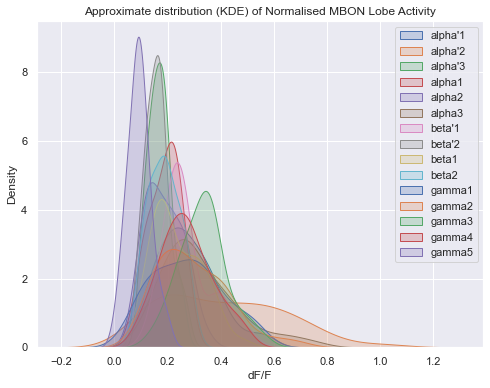

In [13]:
plt.figure(figsize=[8,6])
plt.title('Approximate distribution (KDE) of Normalised MBON Lobe Activity')
plt.xlabel('dF/F')

for col in cols:
    # sns.histplot(data=normalised_lobe_data[col], kde=True, alpha=0.5)
    sns.kdeplot(data=normalised_lobe_data_hije[col], fill=True, label=col)
plt.legend()

plt.show()

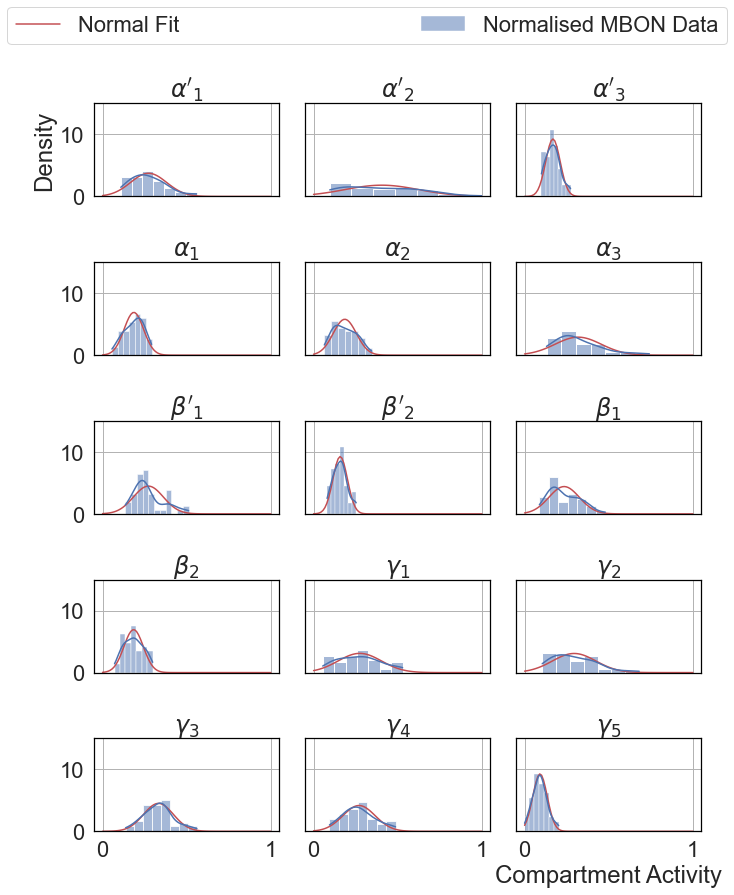

In [60]:
fig, axes = plt.subplots(5, 3, figsize=(10,12), sharex='all', sharey='all')
# fig.suptitle('Fit Normal Distribution to MBON Activity ')

for i, lobe in enumerate(lobes):
    data = normalised_lobe_data_hije[lobe]
    try:
        fit_params = norm.fit(data)
    except Exception as e:
        print(lobe, e)
        data = normalised_lobe_data_hije[lobe].copy()
        data.loc[data==0] = 0.001
        fit_params = norm.fit(data)

    x = np.linspace(0,1,90)
    y = norm.pdf(x, loc=fit_params[0], scale=fit_params[1])

    ax = axes[int(i/3), i%3]
    ax.set_title(greek_lobes[i])
    ax.set_ylim([0, 15])
    ax.plot(x, y, 'r', label='Normal Fit')
    sns.histplot(data=data, kde=True, stat='density', label='Normalised MBON Data', ax=ax)
    ax.set_xlabel('')
    if i == 0:
        ax.set_ylabel('Density')
    else:
        ax.set_ylabel('')

ax.set_xlabel('Compartment Activity')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, mode="expand", bbox_to_anchor=(0., .95, 1., .10), borderaxespad=0.)
plt.tight_layout()
plt.savefig('mbon-distribution.png', bbox_inches='tight')
plt.show()

# Examine distributions for each stimulus (Siju)

In [61]:
# Replace data with the normalised data
sdf_norm = sdf.copy()
sdf_norm['DAN dF/F'] = normalised_lobe_data

# Remove multi indexed columns
temp_df = sdf_norm.copy()
sdf_norm = temp_df['DAN dF/F']
sdf_norm['stimulus'] = temp_df['stimulus']

sdf_norm

lobe,alpha'1,alpha'2,alpha'3,alpha1,alpha2,alpha3,beta'1,beta'2,beta1,beta2,gamma1,gamma2,gamma3,gamma4,gamma5,stimulus
id,,,,,,,,,,,,,,,,
TH-58E02_090816_Citronella,0.166476,0.151341,0.107413,0.134653,0.108488,0.295425,0.192497,0.251604,0.201407,0.287672,0.066310,0.123128,0.220887,0.240411,0.133697,citronella
TH-58E02_170816_Citronella,0.155969,0.178522,0.095519,0.062310,0.111945,0.141672,0.161945,0.176924,0.120546,0.204802,0.065366,0.212328,0.203247,0.125897,0.071863,citronella
181022_TH58E02G6f_ST00_0_Citronella,0.153987,0.073836,0.143546,0.051362,0.077078,0.205044,0.218131,0.212221,0.117536,0.173473,0.113264,0.150010,0.292277,0.262237,0.076634,citronella
171016_Citronella 2,0.198140,0.154871,0.051806,0.086135,0.204309,0.056421,0.072854,0.059222,0.050926,0.052359,0.050496,0.084289,0.063488,0.065374,0.058869,citronella
171016_Citronella 1,0.212484,0.181283,0.660857,0.078317,0.272914,0.190534,0.215042,0.191501,0.103905,0.179075,0.142986,0.195849,0.209666,0.156431,0.076798,citronella
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161128_0_TH58E02G6f_ST00_0_Yeast,0.099022,0.236931,0.479086,0.128177,0.187359,0.028422,0.271531,0.312600,0.202036,0.320997,0.088492,0.123635,0.297040,0.398573,0.161226,yeast
190426_0_TH58E02G6f_ST00_0_Yeast,0.104526,0.228018,0.463080,0.068779,0.194041,0.183629,0.413456,0.271313,0.290272,0.177276,0.271509,0.171645,0.292033,0.344938,0.123636,yeast
190425_0_TH58E02G6f_ST00_1_Yeast,0.058260,0.065320,0.555873,0.027186,0.104051,0.154941,0.158611,0.195322,0.061368,0.138892,0.147760,0.064141,0.189136,0.210173,0.075504,yeast


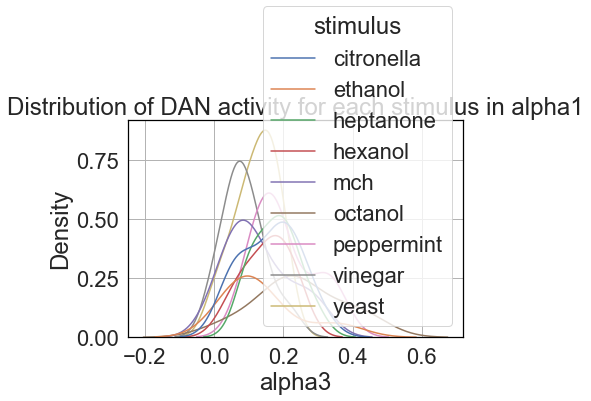

In [73]:
fig = plt.figure()
sns.kdeplot(data=sdf_norm, x='alpha3', hue='stimulus')
plt.title('Distribution of DAN activity for each stimulus in alpha1')
plt.show()

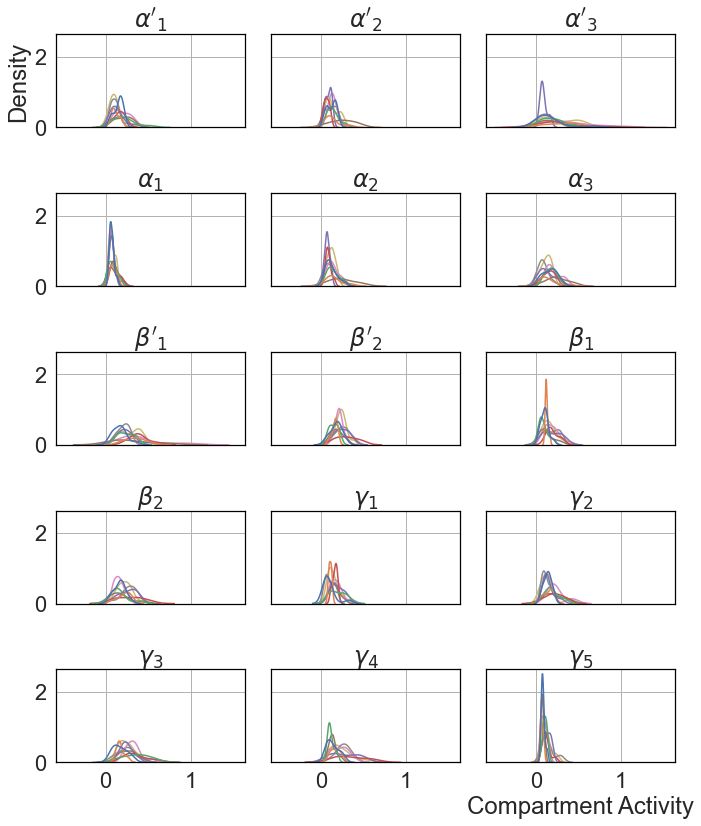

In [65]:
fig, axes = plt.subplots(5, 3, figsize=(10,12), sharex='all', sharey='all')
# fig.suptitle('Examine DAN Activity for every stimulus in each lobe')

for i, lobe in enumerate(lobes):
    ax = axes[int(i/3), i%3]
    ax.set_title(greek_lobes[i])
    ax.set_xlabel('')
    sns.kdeplot(data=sdf_norm, x=lobe, hue='stimulus', ax=ax, legend=False)
    ax.set_xlabel('')
    if i == 0:
        ax.set_ylabel('Density')
    else:
        ax.set_ylabel('')

ax.set_xlabel('Compartment Activity')
plt.tight_layout()
plt.savefig('dan-distribution-all-stimuli.png', bbox_inches='tight')
plt.show()

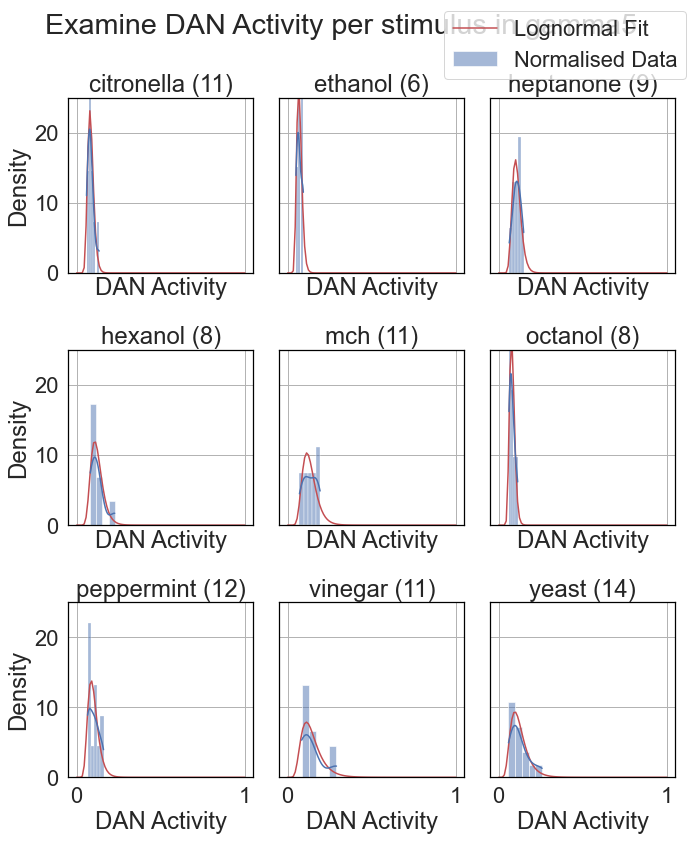

In [77]:
lobe = "gamma5"
stimuli = sdf_norm['stimulus'].unique()

fig, axes = plt.subplots(3, 3, figsize=(10,12), sharex='all', sharey='all')
fig.suptitle(f'Examine DAN Activity per stimulus in {lobe}')

for i, stimulus in enumerate(stimuli):

    data = sdf_norm[sdf_norm['stimulus'] == stimulus][lobe]
    try:
        fit_params = lognorm.fit(data, floc=0)
    except Exception as e:
        print(lobe, e)
        data = data.copy()
        data.loc[data==0] = 0.001
        fit_params = lognorm.fit(data, floc=0)

    x = np.linspace(0,1,90)
    y = lognorm.pdf(x, s=fit_params[0], loc=fit_params[1], scale=fit_params[2])

    ax = axes[int(i/3), i%3]
    ax.set_title(f'{stimulus} ({data.shape[0]})')
    ax.set_ylim([0, 25])
    ax.set_xlabel(f'DAN Activity')
    ax.plot(x, y, 'r', label='Lognormal Fit')
    sns.histplot(data=data, kde=True, stat='density', label='Normalised Data', ax=ax)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()

## Fit a distribution for each stimulus of every lobe (Siju)

In [78]:
lobes = sdf_norm.columns[:-1]
stimuli = sdf.stimulus.unique()

siju_lognorm_fit = {}

for lobe in lobes:
    siju_lognorm_fit[lobe] = {}
    for stimulus in stimuli:
        data = sdf_norm[sdf_norm['stimulus'] == stimulus][lobe]

        try:
            fit_params = lognorm.fit(data, floc=0)
        except Exception as e:
            data = data.copy()
            data.loc[data == 0] = 0.001
            fit_params = lognorm.fit(data, floc=0)
        
        siju_lognorm_fit[lobe][stimulus] = fit_params


In [79]:
siju_lognorm_fit["gamma5"]

{'citronella': (0.21419765349758987, 0.0, 0.08239164886414208),
 'ethanol': (0.22149642360089902, 0.0, 0.06851761186365027),
 'heptanone': (0.24113276857789132, 0.0, 0.10523659402711406),
 'hexanol': (0.2967315497158802, 0.0, 0.11725265021301307),
 'mch': (0.3225015056172133, 0.0, 0.12641411735609456),
 'octanol': (0.1907617921889617, 0.0, 0.07890945398708087),
 'peppermint': (0.3170122975280451, 0.0, 0.09569005905116312),
 'vinegar': (0.41796606360845784, 0.0, 0.1323639891695748),
 'yeast': (0.4084168334700918, 0.0, 0.11352791146203844)}

## Now do the same thing for MBON data

In [80]:
# Replace data with the normalised data
hdf_norm = hdf.copy()
hdf_norm['MBON dF/F'] = normalised_lobe_data_hije

# Remove multi indexed columns
temp_df = hdf_norm.copy()
hdf_norm = temp_df['MBON dF/F']
hdf_norm['stimulus'] = temp_df['stimulus']

hdf_norm.head(10)

lobe,alpha'1,alpha'2,alpha'3,alpha1,alpha2,alpha3,beta'1,beta'2,beta1,beta2,gamma1,gamma2,gamma3,gamma4,gamma5,stimulus
id,,,,,,,,,,,,,,,,
2-heptanone_fly0,0.465882,0.441299,0.172620,0.291546,0.315104,0.418187,0.276625,0.249827,0.307248,0.155123,0.391575,0.528442,0.363341,0.487177,0.151651,heptanone
2-heptanone_fly1,0.377294,0.702011,0.195219,0.275419,0.268423,0.223441,0.243939,0.186112,0.370564,0.265137,0.444925,0.333524,0.400370,0.434749,0.100278,heptanone
2-heptanone_fly2,0.286197,0.535954,0.209487,0.248890,0.286713,0.622465,0.250244,0.195176,0.393559,0.224491,0.271863,0.277668,0.342509,0.383044,0.084666,heptanone
2-heptanone_fly3,0.322676,0.418111,0.201386,0.219340,0.216918,0.376436,0.334998,0.144037,0.258239,0.109733,0.356425,0.293065,0.560786,0.347802,0.075668,heptanone
2-heptanone_fly4,0.170288,0.223161,0.154691,0.197096,0.190378,0.226818,0.240204,0.108460,0.174944,0.136054,0.154210,0.160754,0.330588,0.288308,0.058677,heptanone
citronella_fly0,0.135776,0.164632,0.117389,0.180203,0.145598,0.189940,0.152870,0.122449,0.105289,0.137222,0.174422,0.154362,0.136887,0.204740,0.083710,citronella
citronella_fly1,0.125832,0.352903,0.121524,0.104250,0.113184,0.140749,0.135115,0.132989,0.114716,0.222273,0.071802,0.128584,0.174252,0.193969,0.074979,citronella
citronella_fly2,0.144783,0.118276,0.102452,0.138683,0.140052,0.195931,0.193164,0.135715,0.218177,0.157842,0.120378,0.164825,0.265403,0.271515,0.040577,citronella
citronella_fly3,0.115604,0.190119,0.136333,0.102409,0.104029,0.160483,0.173230,0.115758,0.133599,0.115237,0.106842,0.104761,0.269442,0.116793,0.061319,citronella


In [81]:
hdf_norm.max()

lobe
alpha'1     0.558675
alpha'2            1
alpha'3      0.27329
alpha1      0.291546
alpha2       0.34635
alpha3      0.741578
beta'1      0.511666
beta'2       0.25332
beta1       0.479434
beta2       0.297975
gamma1      0.529319
gamma2      0.681073
gamma3      0.560786
gamma4      0.487177
gamma5      0.202843
stimulus       yeast
dtype: object

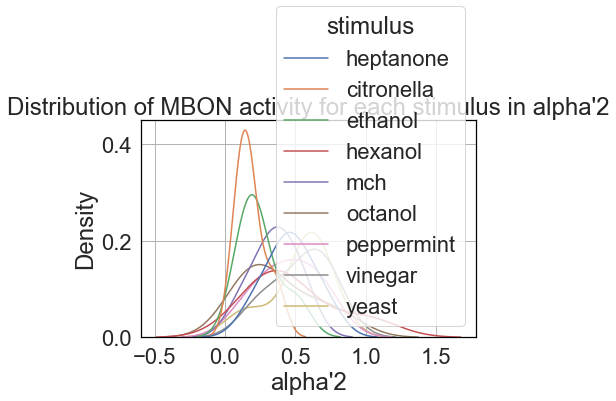

In [82]:
lobe = "alpha'2"
plt.figure()
sns.kdeplot(data=hdf_norm, x=lobe, hue='stimulus')
plt.title(f'Distribution of MBON activity for each stimulus in {lobe}')
plt.show()

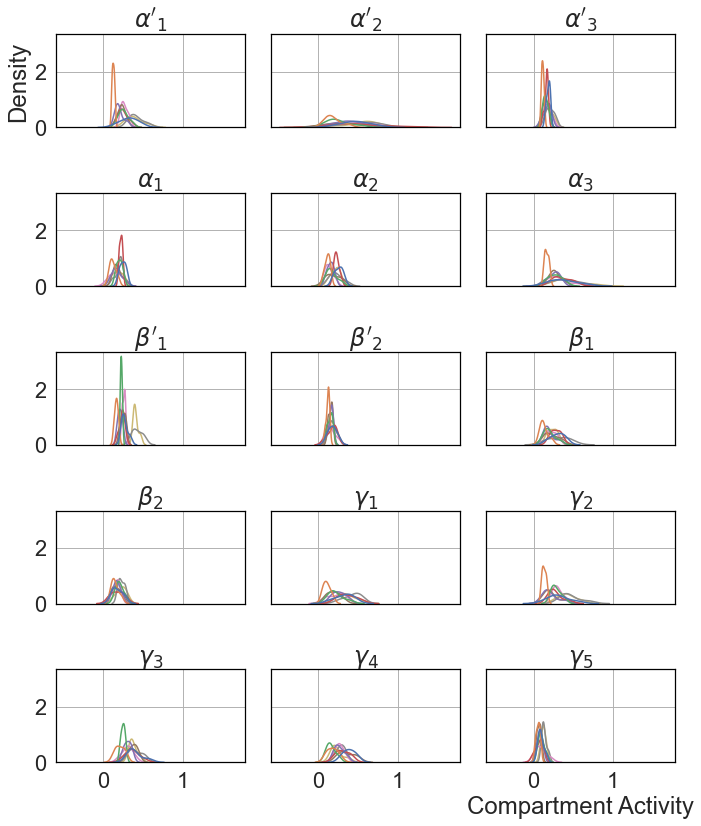

In [84]:
fig, axes = plt.subplots(5, 3, figsize=(10,12), sharex='all', sharey='all')
# fig.suptitle('Examine MBON Activity for every stimulus in each lobe')

for i, lobe in enumerate(lobes):
    ax = axes[int(i/3), i%3]
    ax.set_title(greek_lobes[i])
    ax.set_xlabel('')
    sns.kdeplot(data=hdf_norm, x=lobe, hue='stimulus', ax=ax, legend=False)
    ax.set_xlabel('')
    if i == 0:
        ax.set_ylabel('Density')
    else:
        ax.set_ylabel('')

ax.set_xlabel('Compartment Activity')
plt.tight_layout()
plt.savefig('mbon-distribution-all-stimuli.png', bbox_inches='tight')
plt.show()

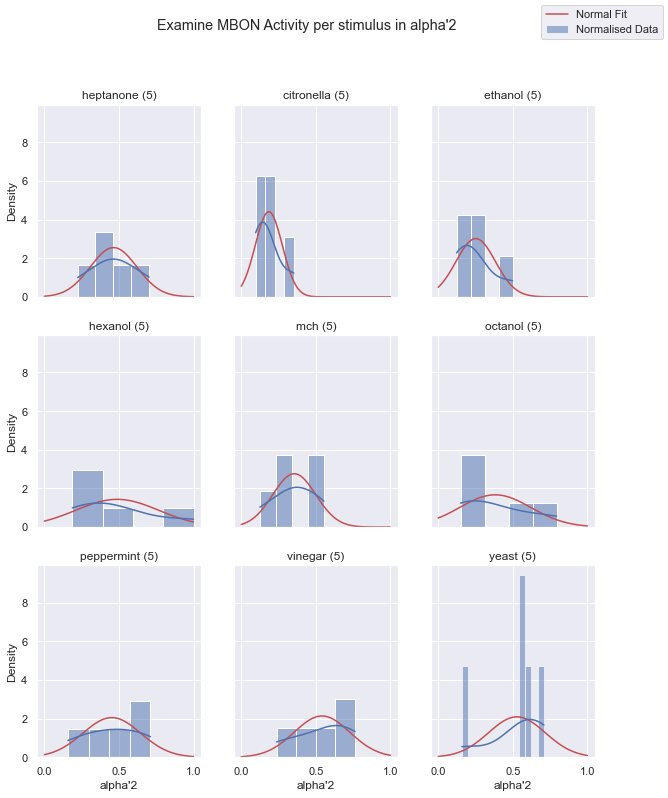

In [25]:
stimuli = hdf_norm['stimulus'].unique()
lobe = "alpha'2"

fig, axes = plt.subplots(3, 3, figsize=(10,12), sharex='all', sharey='all')
fig.suptitle(f'Examine MBON Activity per stimulus in {lobe}')

for i, stimulus in enumerate(stimuli):
    data = hdf_norm[hdf_norm['stimulus'] == stimulus][lobe]

    try:
        fit_params = norm.fit(data)
    except Exception as e:
        print(lobe, stimulus, e)
        data.loc[data==0] = 0.001
        data.loc[data==0] = 0.001
        fit_params = norm.fit(data)
    
    x = np.linspace(0,1,90)
    y = norm.pdf(x, loc=fit_params[0], scale=fit_params[1])

    
    ax = axes[int(i/3), i%3]
    ax.set_title(f'{stimulus} ({data.shape[0]})')
    ax.set_xlabel('')

    ax.plot(x, y, 'r', label='Normal Fit')
    sns.histplot(data=data, kde=True, stat='density', label='Normalised Data', ax=ax)
    # sns.kdeplot(data=sdf[sdf['stimulus'] == stimulus], x=lobe, ax=ax, legend=False)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.show()

In [26]:
lobes = sdf_norm.columns[:-1]
stimuli = hdf.stimulus.unique()

hije_norm_fit = {}

for lobe in lobes:
    hije_norm_fit[lobe] = {}
    for stimulus in stimuli:
        data = hdf_norm[hdf_norm['stimulus'] == stimulus][lobe]

        try:
            fit_params = norm.fit(data)
        except Exception as e:
            data = data.copy()
            data.loc[data == 0] = 0.001
            fit_params = norm.fit(data)
        
        hije_norm_fit[lobe][stimulus] = fit_params



### Test sampling (Hije)

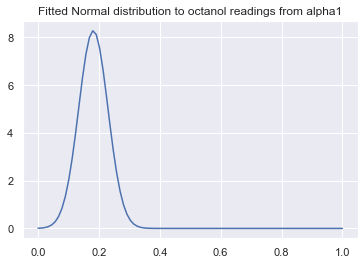

In [27]:
lobe = 'alpha1'
stimulus = 'octanol'
params = hije_norm_fit[lobe][stimulus]

x = np.linspace(0,1,90)
rv = norm(loc=params[0], scale=params[1])
y = rv.pdf(x)

plt.title(f'Fitted Normal distribution to {stimulus} readings from {lobe}')
plt.plot(x,y)
plt.show()

In [28]:
# Now sample from the distribution
samples = rv.rvs((1000))

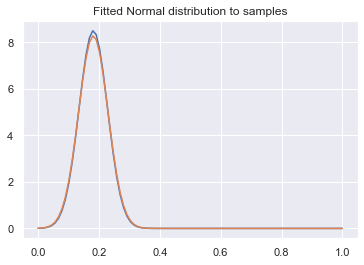

In [29]:
sample_params = norm.fit(samples)

xs = np.linspace(0,1,90)
rv = norm(loc=sample_params[0], scale=sample_params[1])
ys = rv.pdf(x)

plt.title(f'Fitted Normal distribution to samples')
plt.plot(xs,ys)
plt.plot(x,y)
plt.show()

From this, it is clear that the samples drawn from the distribution are in fact correct! So the parameters found earlier can be used.

# Build A Datamatrix from Sampling the Distributions

Sample the distributions that were found for each stimulus, in each lobe to build a new dataset.

In [30]:
lobes = lobes
stimuli = stimuli
samples_per_stimulus = 50

X = np.zeros([len(stimuli) * samples_per_stimulus, len(lobes)])
Y = np.zeros([len(stimuli) * samples_per_stimulus, len(lobes)])

for i, stimulus in enumerate(stimuli):
    for j, lobe in enumerate(lobes):
        mbon_params = hije_norm_fit[lobe][stimulus]
        dan_params = siju_lognorm_fit[lobe][stimulus]
        
        mbon_rv = norm(loc=mbon_params[0], scale=mbon_params[1])
        dan_rv = lognorm(s=dan_params[0], loc=dan_params[1], scale=dan_params[2])
        
        X[i*samples_per_stimulus:(i+1)*samples_per_stimulus, j] = dan_rv.rvs(samples_per_stimulus)
        Y[i*samples_per_stimulus:(i+1)*samples_per_stimulus, j] = mbon_rv.rvs(samples_per_stimulus)        
        
        

In [31]:
Y.min()

-0.38745154862639725